In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sparse_rf.algs.core import min_wl2, min_l2
from sparse_rf.modules import make_X, make_W, make_A
from sparse_rf.util import *

In [2]:
m = 1000
d = 5
q = 2
active = fourier

ratio_train = 0.75

def make_D(W):
    norm = np.linalg.norm(W, axis=1)**2
    weight = np.concatenate((norm, norm), axis=-1)
    D = np.diag(1.0/weight**4)
    return D

In [3]:
X = make_X(d, m, dist=sphere)
X_train = X[:int(m*ratio_train), :]
X_test = X[int(m*ratio_train):, :]

In [4]:
b = np.zeros(d)
b[0] = 1
b[2] = 2
b /= np.linalg.norm(b)
y = np.matmul(X, b) + 0.1
y_train = y[:int(m*ratio_train)]
y_test = y[int(m*ratio_train):]

In [5]:
ns = np.arange(10, 250, 10)

# Dense features

## No ensemble

In [6]:
results_l2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense.append(res)

[2.6908612071363594e-05, 6.091178989962068e-07, 1.7790269648829778e-07, 7.671734111217158e-08, 1.0714654272171207e-07, 1.645030519466328e-07, 1.3792083416284104e-07, 1.6633995566103755e-07, 1.9908735356701942e-07, 1.7304202001310804e-07, 1.9670139350692498e-07, 2.1169005600511682e-07, 2.523541052341149e-07, 2.4225790009414433e-07, 2.2272344691297105e-07, 2.6996140421490536e-07, 2.486418068932121e-07, 2.3858556748864323e-07, 2.518001347613249e-07, 2.8126666027068614e-07, 2.7228534413824553e-07, 2.7633396830413293e-07, 2.8791132325456116e-07, 2.6255435094912147e-07]


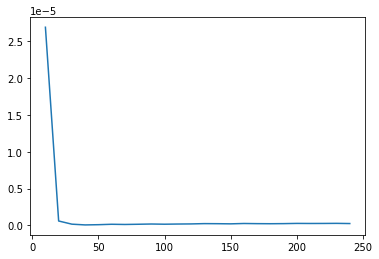

In [7]:
print([np.mean(res) for res in results_l2_dense])
plt.plot(ns, [np.mean(res) for res in results_l2_dense])

In [8]:
results_wl2_dense = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, n*comb(d, q), dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense.append(res)

[2.5403733875119712e-05, 4.378682708188726e-07, 1.7232009373781452e-07, 2.3270689111647665e-08, 6.199790715735406e-09, 3.247725764679433e-09, 2.917938233297813e-09, 2.044366584262874e-09, 1.2586932457891382e-09, 1.1878466517916086e-09, 9.727733303818372e-10, 6.68125925826381e-10, 6.048023584773861e-10, 6.071517183874882e-10, 3.944978838564714e-10, 4.5143736208285895e-10, 3.886962329727376e-10, 3.7429975997824283e-10, 6.52514612634438e-10, 3.4636137375441195e-10, 2.7146160229110103e-10, 3.211459156604339e-10, 1.9746621542662738e-10, 4.2804337000941365e-10]


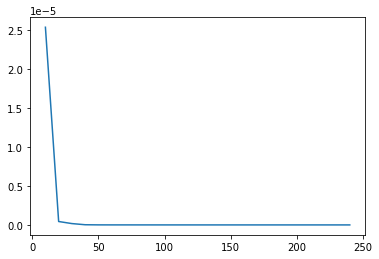

In [9]:
print([np.mean(res) for res in results_wl2_dense])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense])

## Ensemble

In [10]:
results_l2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_dense_ens.append(res)

[0.0015577376592557117, 0.0013160364326892536, 0.0010619157266712749, 0.0011401778529831256, 0.0010661852473816589, 0.0009372663448025953, 0.001032368837060607, 0.0009268818341546523, 0.0010475443174042358, 0.0009604774981906896, 0.0009783040932260037, 0.0009971521476114995, 0.0009964896402958542, 0.0009509578781287774, 0.0008764697560617041, 0.0009117524765618107, 0.0008848319611048965, 0.0009023581616853661, 0.000872109258880267, 0.0008873717731212605, 0.0008473630446372499, 0.0008830072069213258, 0.0008629004846531337, 0.0008616913509859024]


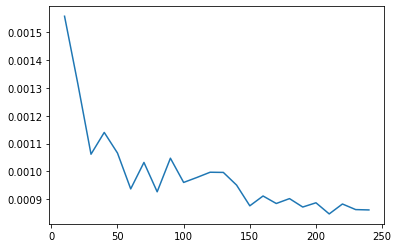

In [11]:
print([np.mean(res) for res in results_l2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_dense_ens])

In [12]:
results_wl2_dense_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, d, comb(d, q), dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_dense_ens.append(res)

[0.0018043259002657477, 0.00124568762405519, 0.001160745829917258, 0.0010699164844178498, 0.0011181759342741451, 0.0009871720902831802, 0.001003263388918798, 0.0009267130472675976, 0.0009202706032339048, 0.0009471615204980461, 0.0009834362939254461, 0.000927282835885836, 0.000922183903976281, 0.0009055092267979788, 0.0009513209811786532, 0.0009388748061646896, 0.0009481507671212739, 0.0009021932107311527, 0.0008560591661291603, 0.0008950015487928384, 0.0009055378142926984, 0.0008640489152201208, 0.0008654404011788901, 0.0008811608766663289]


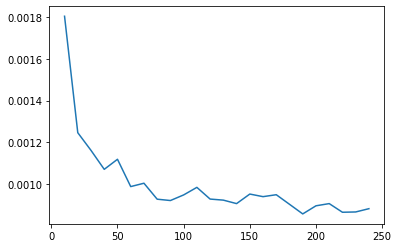

In [13]:
print([np.mean(res) for res in results_wl2_dense_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_dense_ens])

# Sparse features

## No ensemble

In [14]:
results_l2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse.append(res)

[9.333199803793304e-09, 2.0831029351417664e-06, 7.473653446472952e-05, 9.918989946495604e-05, 7.10749224384565e-05, 4.796668155157684e-05, 4.714846528672038e-05, 3.1205298817110416e-05, 3.104473514461763e-05, 4.470430980697749e-05, 2.7578968152172776e-05, 2.0739227257485914e-05, 1.3703545194182264e-05, 4.936304900140038e-06, 5.974305502569749e-06, 4.190208456983063e-06, 4.83838202981582e-06, 3.3463746421782356e-06, 3.4785103626631153e-06, 2.467376909912585e-06, 1.8266637981729173e-06, 2.1212414868508637e-06, 1.6962934672357467e-06, 1.01725620978462e-06]


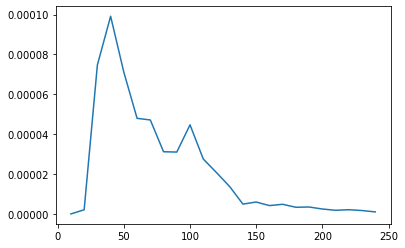

In [15]:
print([np.mean(res) for res in results_l2_sparse])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse])

In [16]:
results_wl2_sparse = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, n, dist=normal)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse.append(res)

[1.3397055385654814e-08, 7.281568441831069e-09, 1.4211170202466023e-08, 4.6045790416826224e-08, 2.1790415969885547e-09, 4.2411529925122126e-06, 5.678236573419274e-09, 6.390809217118264e-09, 2.7940584285475237e-07, 2.162125120043337e-08, 2.2233457462187158e-07, 5.566073372709856e-09, 9.626334833528728e-07, 1.1401761682845908e-06, 4.4876519950602214e-08, 5.034335197574044e-08, 4.503675619228624e-06, 6.570758043173177e-08, 4.2182804122572766e-07, 6.45909188762084e-09, 3.7995258375748117e-08, 9.915684186147197e-07, 3.846994000715141e-09, 3.132914809945676e-08]


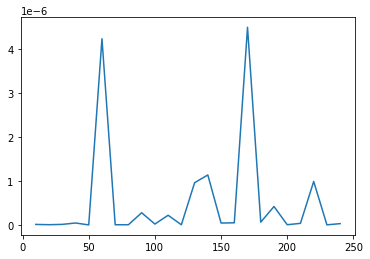

In [17]:
print([np.mean(res) for res in results_wl2_sparse])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse])

## Ensemble

In [18]:
results_l2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_l2(A_train, y_train) for A_train in A_trains]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_l2_sparse_ens.append(res)

[0.0007438240517065601, 0.000514350709034513, 0.00035443244007082387, 0.0004105511572998277, 0.0003932607081948791, 0.00039332735184453534, 0.0004113317913216931, 0.0004155303756681487, 0.00040254399156085615, 0.00039348736001331103, 0.00039341901874760996, 0.0003626130328165755, 0.00037289185634292396, 0.0003633397221634218, 0.0003621215862338968, 0.00038636273112117533, 0.00036389737839980386, 0.0003706993390912395, 0.00036650276016273706, 0.0003582150822309632, 0.0003675344968583599, 0.00035850064723687584, 0.00039499965130635297, 0.0003986439494291242]


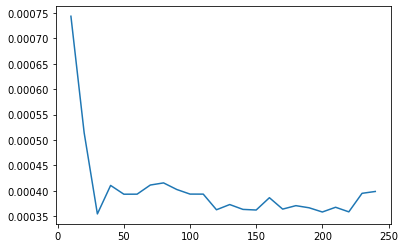

In [19]:
print([np.mean(res) for res in results_l2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_l2_sparse_ens])

In [20]:
results_wl2_sparse_ens = []
for n in ns:
    res = []
    for _ in range(5):
        Ws = [make_W(d, q, 1, dist=normal) for _ in range(n)]
        Ds = [make_D(W) for W in Ws]
        A_trains = [make_A(X_train, W, active=active) for W in Ws]
        A_tests = [make_A(X_test, W, active=active) for W in Ws]
        cs = [min_wl2(A_train, y_train, D) for A_train, D in zip(A_trains, Ds)]
        y_pred = np.mean(np.array([A_tests[i]@cs[i] for i in range(len(Ws))]), axis=0)
        res.append(np.linalg.norm(y_pred-y_test) / len(y_test))

    results_wl2_sparse_ens.append(res)

[0.0004221275408508355, 0.00044486102878281495, 0.00047924333982411326, 0.00041161819881349707, 0.000440244303259495, 0.0004053484075878536, 0.0004047991886500229, 0.0003730174150415917, 0.0004165027483410169, 0.000444126434689357, 0.00036142521035472476, 0.00041719843492215685, 0.0003555802692378781, 0.00034438665713114097, 0.0003900934220812479, 0.00038877620668725837, 0.0004009366177871609, 0.0003763258610461535, 0.00036421102626952846, 0.0003919583753620679, 0.00037319325468123136, 0.0003614828084157559, 0.00036216704824041865, 0.0003943727804752123]


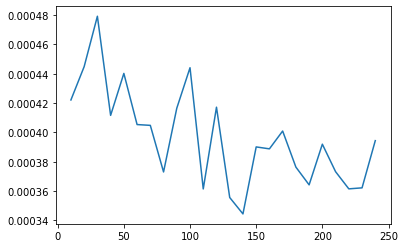

In [21]:
print([np.mean(res) for res in results_wl2_sparse_ens])
plt.plot(ns, [np.mean(res) for res in results_wl2_sparse_ens])